In [1]:
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, average_precision_score

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

In [2]:
# let's input data
train = pd.read_csv('../Data/processed_data/train.csv')
test = pd.read_csv('../Data/processed_data/test.csv')
validation = pd.read_csv('../Data/processed_data/validation.csv')
# onehot encoding
train = pd.get_dummies(train, columns = ['label'], prefix ='', prefix_sep='', dtype=int)
test = pd.get_dummies(test, columns = ['label'], prefix ='', prefix_sep='', dtype=int)
validation = pd.get_dummies(validation, columns = ['label'], prefix ='', prefix_sep='', dtype=int)

In [3]:
X_train = train.iloc[:,1:27]
y_train = train.iloc[:,-2]
X_test = test.iloc[:,1:27]
y_test = test.iloc[:,-2]
X_validation = validation.iloc[:,1:27]
y_validation = validation.iloc[:,-2]

In [4]:
sc_x = StandardScaler()
X_train_std = sc_x.fit(X_train).transform(X_train)
X_test_std = sc_x.fit(X_train).transform(X_test)
X_validation_std = sc_x.fit(X_train).transform(X_validation)

Training, misclassified examples: 33
Training, prediction accuracy: 0.974
------------
Validation, misclassified examples: 11
Validation, prediction accuracy: 0.960
------------
Test, misclassified examples: 7
Test, prediction accuracy: 0.975


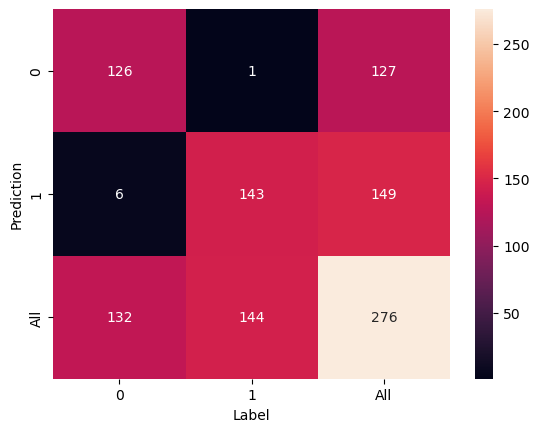

In [5]:
#SVM
from sklearn import svm
clf = svm.SVC(probability=True)
clf.fit(X_train_std,y_train)

# print accuracy for train
y_pred = clf.predict(X_train_std)
print('Training, misclassified examples: %d' % (y_train != y_pred).sum())
error_train_tf = (y_train != y_pred).sum()/len(y_pred)
print('Training, prediction accuracy: %.3f'% (1-error_train_tf))

print('------------')
# print accuracy for validation
y_pred = clf.predict(X_validation_std)
print('Validation, misclassified examples: %d' % (y_validation != y_pred).sum())
error_train_tf = (y_validation != y_pred).sum()/len(y_pred)
print('Validation, prediction accuracy: %.3f'% (1-error_train_tf))


# print accuracy for test
print('------------')
y_pred = clf.predict(X_test_std)
print('Test, misclassified examples: %d' % (y_test != y_pred).sum())
error_test_tf = (y_test != y_pred).sum()/len(y_pred)
print('Test, prediction accuracy: %.3f'% (1-error_test_tf))
confusion_matrix = pd.crosstab(y_pred,y_test, rownames=['Prediction'], colnames=['Label'],margins = True)
sns.heatmap(confusion_matrix, annot=True,fmt='g')
pass

In [6]:
# Looking at precision, recall and F1 scores
print('Precision score: %.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall score: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('F1 score %.3f' % f1_score(y_test, y_pred, average='macro'))

Precision score: 0.976
Recall score: 0.974
F1 score 0.975


In [7]:
# Looking at the classification report
print('\n Classification report for k=5:\n', classification_report(y_test, y_pred))


 Classification report for k=5:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       132
           1       0.96      0.99      0.98       144

    accuracy                           0.97       276
   macro avg       0.98      0.97      0.97       276
weighted avg       0.98      0.97      0.97       276



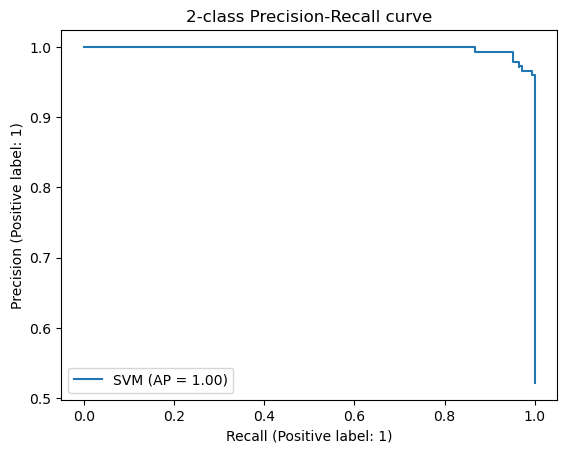

In [8]:
from sklearn.metrics import PrecisionRecallDisplay
y_score = clf.decision_function(X_test_std)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="SVM"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
pd.DataFrame(y_score).to_csv('../Data/model_predictions/SVM_model.csv')